Assignment 3

First Name : Kinjal

Last Name : Kathiriya

1.	Regression Analysis 

•	Part A  
a.	Load and preprocess the data using Pandas and remove the unneeded attributes. For the purpose of this assignment you do not need to normalize or standardize the data unless explicitly required in one of the following tasks. However, you may need to handle missing values by imputing those values based on variable means.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "communities.csv"  # Change this to the actual file path
df = pd.read_csv(file_path)

# Remove identifier attributes
df = df.drop(columns=["state", "communityname"], errors="ignore")

# Convert all columns to numeric, replacing non-numeric values with NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Fill missing values with column means
df.fillna(df.mean(), inplace=True)

# Check if all values are numeric
print(df.dtypes)


population             float64
householdsize          float64
racepctblack           float64
racePctWhite           float64
racePctAsian           float64
                        ...   
PctSameState85         float64
LandArea               float64
PopDens                float64
PctUsePubTrans         float64
ViolentCrimesPerPop    float64
Length: 98, dtype: object


(b) Compute Basic Statistics & Split Data

In [5]:
# Compute basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Separate target variable (ViolentCrimesPerPop)
target_column = "ViolentCrimesPerPop"
X = df.drop(columns=[target_column])
y = df[target_column]

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Output data shape
print("\nTraining Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)




Basic Statistics:
        population  householdsize  racepctblack  racePctWhite  racePctAsian  \
count  1994.000000    1994.000000   1994.000000   1994.000000   1994.000000   
mean      0.057593       0.463395      0.179629      0.753716      0.153681   
std       0.126906       0.163717      0.253442      0.244039      0.208877   
min       0.000000       0.000000      0.000000      0.000000      0.000000   
25%       0.010000       0.350000      0.020000      0.630000      0.040000   
50%       0.020000       0.440000      0.060000      0.850000      0.070000   
75%       0.050000       0.540000      0.230000      0.940000      0.170000   
max       1.000000       1.000000      1.000000      1.000000      1.000000   

       racePctHisp  agePct12t21  agePct12t29  agePct16t24   agePct65up  ...  \
count  1994.000000  1994.000000  1994.000000  1994.000000  1994.000000  ...   
mean      0.144022     0.424218     0.493867     0.336264     0.423164  ...   
std       0.232492     0.155196 

Part B: Multiple Linear Regression
a.	Perform standard multiple linear regression on data using the scikit-learn Linear Regression module. Compute the RMSE values on the full training data (the 80% partition). 

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on training data
y_train_pred = linear_model.predict(X_train)

# Compute RMSE on training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Training RMSE: {rmse_train:.4f}")


Training RMSE: 0.1262


b.	Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights) and plot them using matplotlib. 

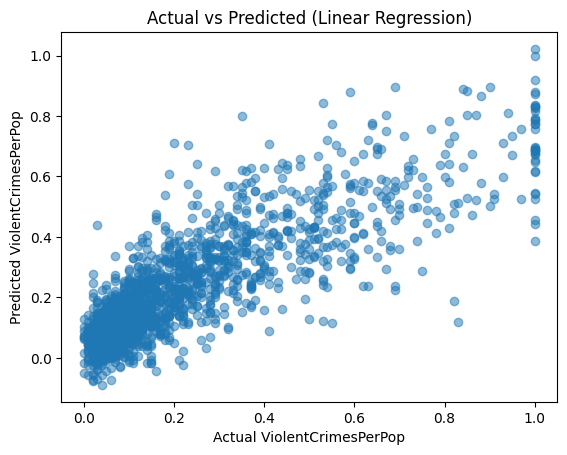

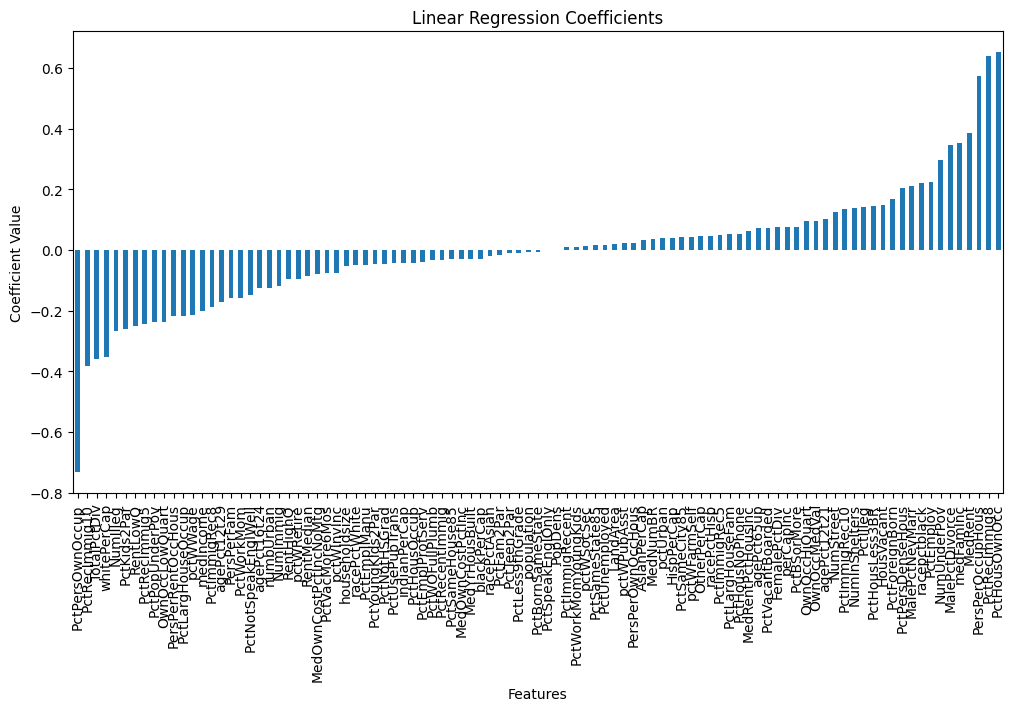

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Scatter plot of actual vs. predicted values
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.xlabel("Actual ViolentCrimesPerPop")
plt.ylabel("Predicted ViolentCrimesPerPop")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

# Display regression coefficients
coefficients = pd.Series(linear_model.coef_, index=X_train.columns)
coefficients_sorted = coefficients.sort_values()

# Plot coefficients
plt.figure(figsize=(12, 6))
coefficients_sorted.plot(kind="bar")
plt.title("Linear Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()


c.	Finally, perform 10-fold cross-validation on the training partition and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection).

In [8]:
from sklearn.model_selection import KFold, cross_val_score

# 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=33)
cv_rmse = np.sqrt(-cross_val_score(linear_model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")).mean()

print("\nComparison of RMSE:")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Cross-Validation RMSE: {cv_rmse:.4f}")



Comparison of RMSE:
Training RMSE: 0.1262
Cross-Validation RMSE: 0.1346


Part C: Feature Selection

•	Part C [15 pts] Feature Selection:  
a.	use the scikit-learn to select the best subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data; target variable; the regression model; and any other parameters you find necessary. 

b.	The function should return the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (use k=5 for consistency) and use feature_selection.SelectPercentile to find the most informative variables for a range of percentile values 

c.	(Note: since this is regression not classification, in the SelectPercentile function you should use feature_selection.f_regression as scoring function rather than chi2).

d.	 You should also plot the model's error values on cross-validation using only the selected features across the range of percentile values. For variety, in this part we will use Mean Absolute Error (MAE) as the error metric instead of RMSE. 

e.	For cross-validation, use scikit's cross_val_score function. In order to use cross_val_score with regression you'll need to pass to it a specific error function. I

f.	n this case, you will use scoring='neg_mean_absolute_error' as a parameter. You should use absolute values to convert these negated MAE values to positive MAE values. Your plot should look similar (but won't be exactly the same as this example). 

g.	Once you have identified the best percentile based on cross-validation, use it to identify and display the corresponding best features. 

h.	As a final step, train your model on the full 80% training data with the optimal subset of features and then compute it's peformance (again using MAE) on the set-aside 20% test partition.

[Note: For an example of a similar feature selection process please review the class example notebook (though note that the task in this example was classification not regression). Also, review scikit-learn documentation for feature selection.]


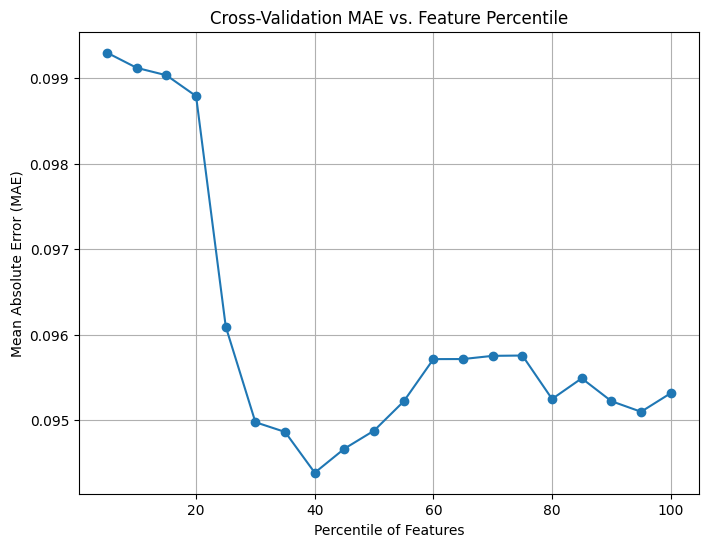

Best Percentile: 40
Selected Features:
Index(['population', 'racepctblack', 'racePctWhite', 'numbUrban', 'medIncome',
       'pctWInvInc', 'pctWPubAsst', 'medFamInc', 'perCapInc', 'NumUnderPov',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
       'PctUnemployed', 'PctEmploy', 'MalePctDivorce', 'FemalePctDiv',
       'TotalPctDiv', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par',
       'PctTeen2Par', 'NumIlleg', 'PctIlleg', 'PctLargHouseFam',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR',
       'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded',
       'PctHousNoPhone', 'PctWOFullPlumb', 'MedRentPctHousInc',
       'NumInShelters', 'NumStreet'],
      dtype='object')
Test Set MAE (with selected features): 0.10154677049936843


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.feature_selection import SelectPercentile, f_regression
import matplotlib.pyplot as plt


# Part C: Feature Selection

def select_best_features(X_train, y_train, model, percentile_range):
    mae_scores = []
    for percentile in percentile_range:
        selector = SelectPercentile(f_regression, percentile=percentile)
        X_train_selected = selector.fit_transform(X_train, y_train)

        # 5-fold cross-validation with MAE
        mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False) # Negative MAE for cross_val_score
        scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring=mae_scorer)
        mae_scores.append(np.mean(np.abs(scores)))  # Take absolute value of negative MAE

    best_percentile = percentile_range[np.argmin(mae_scores)]
    return best_percentile, mae_scores

# Define the range of percentiles to test
percentile_range = range(5, 101, 5)  # Test from 5% to 100% in 5% increments

# Initialize the model
model = LinearRegression()

# Perform feature selection
best_percentile, mae_scores = select_best_features(X_train, y_train, model, percentile_range)

# Plotting MAE vs. Percentile
plt.figure(figsize=(8, 6))
plt.plot(percentile_range, mae_scores, marker="o")
plt.xlabel("Percentile of Features")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Cross-Validation MAE vs. Feature Percentile")
plt.grid(True)
plt.show()

print(f"Best Percentile: {best_percentile}")

# Identify and display the best features
selector = SelectPercentile(f_regression, percentile=best_percentile)
X_train_selected = selector.fit_transform(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]

print("Selected Features:")
print(selected_features)

# Train the model on the full training data with selected features
model_final = LinearRegression()
model_final.fit(X_train[selected_features], y_train)

# Evaluate on the test set
X_test_selected = X_test[selected_features]
y_pred_test = model_final.predict(X_test_selected)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"Test Set MAE (with selected features): {mae_test}")

Part D: Ridge & Lasso Regression with Hyperparameter Tuning

•	Part D [10 pts] 
a.	Next, using the original train and test data in part (a), perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha hyperparameter (the regularization coefficient). 

b.	You should create a function that takes as input the training data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. 

c.	The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). 

d.	For each model, you should also plot the error values (this time using RMSE as the error metric) on the training and cross-validation splits across the specified values of alpha. 

e.	Finally, using the best alpha values for each regression model, train the model on the full training data and evaluate it on the set-aside test data. Discuss your observations and conclusions, especially about the impact of alpha on bias-variance trade-off. [Hint: for an example of a similar model optimization process please review the class example notebook.]


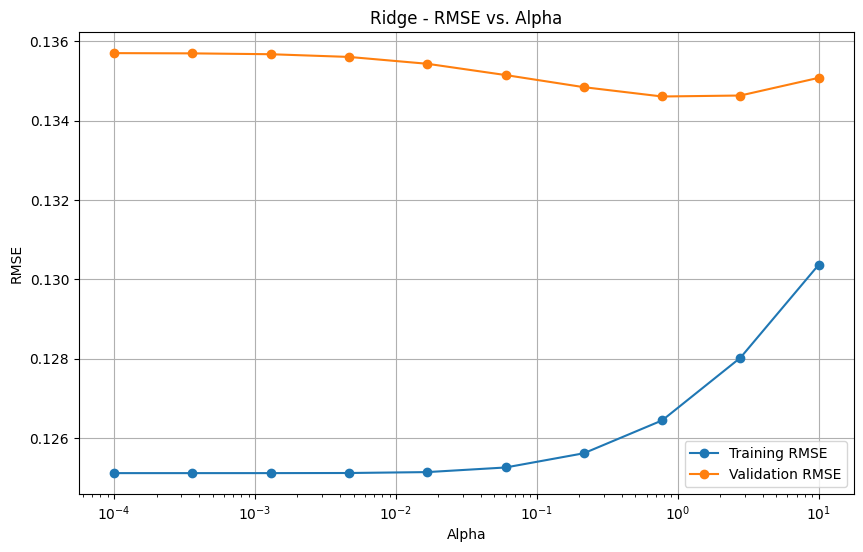

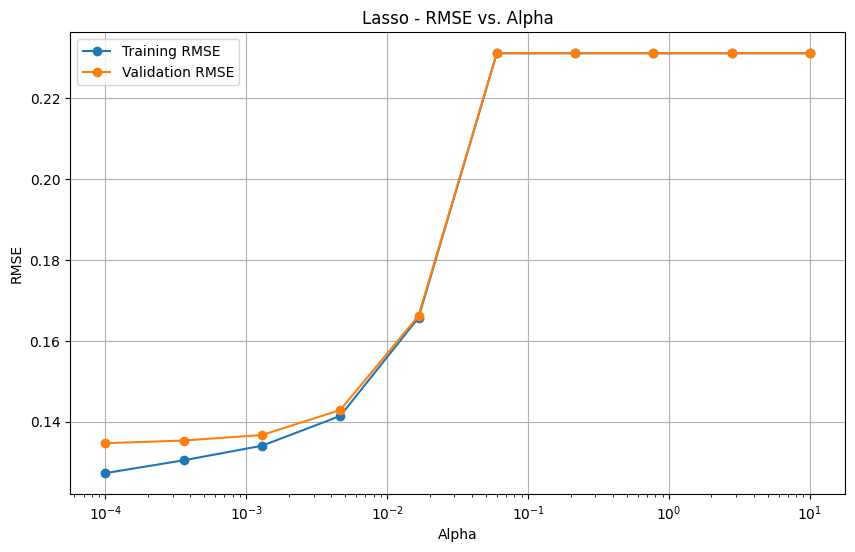

Best Alpha for Ridge: 0.7742636826811278
Best Alpha for Lasso: 0.0001
Test RMSE for Ridge with best alpha: 0.1432816769526198
Test RMSE for Lasso with best alpha: 0.14356532048937354


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def tune_alpha(model_class, X_train, y_train, alpha_values, k=5):
    best_alpha = None
    best_rmse = float('inf')
    train_rmse_list = []
    val_rmse_list = []

    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    for alpha in alpha_values:
        model = model_class(alpha=alpha)
        train_rmse_scores = []
        val_rmse_scores = []

        for train_idx, val_idx in kf.split(X_train):
            X_t, X_v = X_train[train_idx], X_train[val_idx]
            y_t, y_v = y_train[train_idx], y_train[val_idx]
            
            model.fit(X_t, y_t)
            train_predictions = model.predict(X_t)
            val_predictions = model.predict(X_v)
            
            train_rmse = np.sqrt(mean_squared_error(y_t, train_predictions))
            val_rmse = np.sqrt(mean_squared_error(y_v, val_predictions))
            
            train_rmse_scores.append(train_rmse)
            val_rmse_scores.append(val_rmse)

        avg_train_rmse = np.mean(train_rmse_scores)
        avg_val_rmse = np.mean(val_rmse_scores)
        train_rmse_list.append(avg_train_rmse)
        val_rmse_list.append(avg_val_rmse)

        if avg_val_rmse < best_rmse:
            best_rmse = avg_val_rmse
            best_alpha = alpha

    # Plot RMSE values
    plt.figure(figsize=(10, 6))
    plt.plot(alpha_values, train_rmse_list, label='Training RMSE', marker='o')
    plt.plot(alpha_values, val_rmse_list, label='Validation RMSE', marker='o')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('RMSE')
    plt.title(f'{model_class.__name__} - RMSE vs. Alpha')
    plt.legend()
    plt.grid(True)
    plt.show()

    return best_alpha, best_rmse

# Define a range of alpha values
alpha_values = np.logspace(-4, 1, 10)  # Alpha from 0.0001 to 10

# Tune Ridge Regression
best_alpha_ridge, rmse_ridge = tune_alpha(Ridge, X_train.to_numpy(), y_train.values, alpha_values)

# Tune Lasso Regression
best_alpha_lasso, rmse_lasso = tune_alpha(Lasso, X_train.to_numpy(), y_train.values, alpha_values)

print(f"Best Alpha for Ridge: {best_alpha_ridge}")
print(f"Best Alpha for Lasso: {best_alpha_lasso}")

# Train the model with the best alpha on the full training data and evaluate on test data
ridge_final = Ridge(alpha=best_alpha_ridge)
ridge_final.fit(X_train, y_train)
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_final.predict(X_test)))

lasso_final = Lasso(alpha=best_alpha_lasso)
lasso_final.fit(X_train, y_train)
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_final.predict(X_test)))

print(f"Test RMSE for Ridge with best alpha: {ridge_test_rmse}")
print(f"Test RMSE for Lasso with best alpha: {lasso_test_rmse}")


Part E: Stochastic Gradient Descent (SGD) Regression & Elastic Net Optimization

•	Part E  [10 pts] 
a.	Next, perform regression using Stochastic Gradient Descent Regressor from scikit-learn (again use the original train-test split in part (a). Note that SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. 

b.	For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search). Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). 

c.	Using the best parameters, train the model on the full training partition and apply the model to the set-aside test data, comparing traning and test RMSE scores. 

d.	Finally, perform model optimization (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] 

e.	Using the best mixing ratio, apply the Elastic Net model, trained on full training data, to the set-aside test data and compare to the training perfromance. Provide a brief summary of your findings from the above experiments.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

# Define SGD model
sgd = SGDRegressor(max_iter=1000, tol=1e-3)

# Define hyperparameter grid
param_grid = {
    "penalty": ["l1", "l2"],  # Lasso and Ridge
    "alpha": np.logspace(-4, 1, 10)  # Alpha from 0.0001 to 10
}

# Perform Grid Search
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring="neg_root_mean_squared_error")
grid_search.fit(X_train_scaled, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best Parameters (SGD): {best_params}")


Best Parameters (SGD): {'alpha': np.float64(0.001291549665014884), 'penalty': 'l1'}


In [14]:
# Train SGD model with best parameters
best_sgd = SGDRegressor(alpha=best_params["alpha"], penalty=best_params["penalty"], max_iter=1000, tol=1e-3)
best_sgd.fit(X_train_scaled, y_train)

# Predict on test data
y_test_pred_sgd = best_sgd.predict(X_test_scaled)

# Compute RMSE
rmse_sgd_test = np.sqrt(mean_squared_error(y_test, y_test_pred_sgd))
print(f"Test RMSE (SGD): {rmse_sgd_test:.4f}")


Test RMSE (SGD): 0.1455


In [15]:
# Define Elastic Net model
elastic_net = SGDRegressor(penalty="elasticnet", max_iter=1000, tol=1e-3)

# Define parameter grid
param_grid_en = {"l1_ratio": np.linspace(0, 1, 10)}  # l1_ratio from 0 to 1

# Grid Search for best l1_ratio
grid_search_en = GridSearchCV(elastic_net, param_grid_en, cv=5, scoring="neg_root_mean_squared_error")
grid_search_en.fit(X_train_scaled, y_train)

# Best Elastic Net parameter
best_l1_ratio = grid_search_en.best_params_["l1_ratio"]
print(f"Best l1_ratio for Elastic Net: {best_l1_ratio:.2f}")


Best l1_ratio for Elastic Net: 0.89


In [16]:
# Train Elastic Net with best l1_ratio
final_elastic_net = SGDRegressor(penalty="elasticnet", l1_ratio=best_l1_ratio, max_iter=1000, tol=1e-3)
final_elastic_net.fit(X_train_scaled, y_train)

# Predict on test data
y_test_pred_en = final_elastic_net.predict(X_test_scaled)

# Compute RMSE
rmse_en_test = np.sqrt(mean_squared_error(y_test, y_test_pred_en))
print(f"Test RMSE (Elastic Net): {rmse_en_test:.4f}")


Test RMSE (Elastic Net): 0.1460


2.	Automatic Document Clustering 
For this problem you will use a different subset of the 20 Newsgroup data set that you used in Assignment 2  (see the description of the full dataset). The subset for this assignment includes 2,500 documents (newsgroup posts), each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). The documents are represented by 9328 terms (stems). The dictionary (vocabulary) for the data set is given in the file "terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). The actual category labels for the documents are provided in the file "classes.txt". Your goal in this assignment is to perform clustering on the documents and compare the clusters to the actual categories.
Your tasks in this problem are the following [Note: for the clustering part of this assignment you should use the kMeans module form Ch. 10 of MLA (use the version provided here as it includes some corrections to the book version). Do not use the KMeans clustering function in scikit-learn. You may use Pandas and other modules from scikit-learn that you may need for preprocessing or evaluation.]

•	Part A [5 pts] 
a.	Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function in the included module. Note: you should not use external function for computing Cosine. Write your own version that computes Cosine similarity between two n-dimentional vectors and returns the inverse as the distance between these vectors.

In [17]:
import numpy as np

# Step 1: Implement Cosine Distance Function

def cosine_distance(vec1, vec2):
    """
    Computes the Cosine Similarity between two n-dimensional vectors.
    Returns the inverse of similarity (1 - Cosine Similarity) as the distance metric.
    
    Parameters:
    - vec1: First vector (numpy array)
    - vec2: Second vector (numpy array)
    
    Returns:
    - Cosine distance (1 - cosine similarity)
    """
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)

    # Prevent division by zero
    if norm_vec1 == 0 or norm_vec2 == 0:
        return 1.0  # Maximum distance if one vector is zero
    
    similarity = dot_product / (norm_vec1 * norm_vec2)
    
    # Return the inverse for distance metric (1 - Cosine Similarity)
    return 1 - similarity

# Step 2: Test Cosine Distance with Example Vectors


# Test case 1: Similar vectors
vec1 = np.array([1, 2, 3])
vec2 = np.array([2, 3, 4])
print(f" Cosine Distance (vec1, vec2): {cosine_distance(vec1, vec2):.4f}")  # Expected: Small value (close to 0)

# Test case 2: Perpendicular vectors (90 degrees apart)
vec3 = np.array([1, 0, 0])
vec4 = np.array([0, 1, 0])
print(f" Cosine Distance (vec3, vec4): {cosine_distance(vec3, vec4):.4f}")  # Expected: 1 (Maximum distance)

# Test case 3: Identical vectors
vec5 = np.array([3, 3, 3])
vec6 = np.array([3, 3, 3])
print(f" Cosine Distance (vec5, vec6): {cosine_distance(vec5, vec6):.4f}")  # Expected: 0 (Perfect similarity)

# Test case 4: Opposite vectors (180 degrees apart)
vec7 = np.array([1, 2, 3])
vec8 = np.array([-1, -2, -3])
print(f" Cosine Distance (vec7, vec8): {cosine_distance(vec7, vec8):.4f}")  # Expected: 2 (Complete opposite)

# Test case 5: One zero vector
vec9 = np.array([0, 0, 0])
vec10 = np.array([1, 2, 3])
print(f" Cosine Distance (vec9, vec10): {cosine_distance(vec9, vec10):.4f}")  # Expected: 1 (Max distance)


 Cosine Distance (vec1, vec2): 0.0074
 Cosine Distance (vec3, vec4): 1.0000
 Cosine Distance (vec5, vec6): 0.0000
 Cosine Distance (vec7, vec8): 2.0000
 Cosine Distance (vec9, vec10): 1.0000


•	Part B [10 pts] 
a.	Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] 

b.	Then, use the train_test_split function (with random_state = 99) to perform a randomized split the data set (the document by term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. 

c.	Next, as in the previous assignment, perform TFxIDF transformation on these data sets. [Note: if you have difficulty with TFxIDF conversion, then use the original non-transformed data for the remainder of this assignment].

d.	[20 pts] Perform Kmeans clustering on the transformed training data from part (b) Perform a qualitative analysis of the clusters by examining top features in each cluster and identifying patterns in the data. 

e.	To facilitate your analysis of the clusters, write a function to display the top N terms in each cluster sorted by decreasing centroid weights for each term in the cluster (mean TFxIDF frequency of the term). 

f.	Your output should also display the cluster DF value for the top N terms. The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%). For each cluster, you should also display the cluster size (the nunber of documents in the cluster). Here is an example of how this output might look like (here the top 10 terms for a sample of clusters are displayed in decreasing order of mean TFxIDF weights from the cluster centroids (the "Freq" column), but in addition the cluster DF values (both raw and as a percentage) are also shown).


g.	[Extra Credit - 5 pts: use your favorite third party tool or library, ideally with a Python based API, to create a word cloud for each cluster (using your best clustering from earlier experiments.)]

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans


# Step 1: Load Data


# Define the correct file path
file_path = "/Users/kinjalkathiriya/Desktop/Assignment 3/newsgroups5/matrix.txt"

# Load the term-document matrix
matrix = np.loadtxt(file_path, delimiter=",")
doc_term_matrix = matrix.T  # Transpose to document x term format
print(f" Document-Term Matrix Shape: {doc_term_matrix.shape}")  # Expected: (2500, 9328)


#  Step 2: Train-Test Split (80%-20%)
X_train, X_test = train_test_split(doc_term_matrix, test_size=0.2, random_state=99)
print(f" Training Data Shape: {X_train.shape}")  # Expected: (2000, 9328)
print(f" Test Data Shape: {X_test.shape}")  # Expected: (500, 9328)


# Step 3: Apply TF-IDF Transformation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_test_tfidf = tfidf_transformer.transform(X_test)

print(f" TF-IDF Transformed Training Shape: {X_train_tfidf.shape}")
print(f" TF-IDF Transformed Test Shape: {X_test_tfidf.shape}")

#  Step 4: Perform K-Means Clustering
# Define the number of clusters (k)
k = 5  # Adjust based on best clustering performance

# Train KMeans model
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=99, n_init=10)
kmeans.fit(X_train_tfidf)

# Print clustering results
print(f" Clustering completed with {k} clusters.")


 Document-Term Matrix Shape: (2500, 9328)
 Training Data Shape: (2000, 9328)
 Test Data Shape: (500, 9328)
 TF-IDF Transformed Training Shape: (2000, 9328)
 TF-IDF Transformed Test Shape: (500, 9328)
 Clustering completed with 5 clusters.


•	Part C  [5 pts] 
a.	Using the cluster assignments from your Kmeans clustering and the original cluster labels for the training document, compare your clusters to the re-assigned classes by computing the Completeness and Homogeneity values. You should do this for the best values of k and the best clustering run you settled on in the previous part.

In [10]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
newsgroups_train = fetch_20newsgroups(subset='train')

# Convert text into numerical features (TF-IDF representation)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit features for efficiency
X_train = vectorizer.fit_transform(newsgroups_train.data)  # This is now a sparse matrix


In [11]:
from sklearn.cluster import KMeans

k = 5  # Example number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_train)  # Get cluster assignments


In [12]:
from sklearn.metrics import completeness_score, homogeneity_score

true_labels = newsgroups_train.target  # Actual class labels

completeness = completeness_score(true_labels, cluster_labels)
homogeneity = homogeneity_score(true_labels, cluster_labels)

print(f'Completeness Score: {completeness:.4f}')
print(f'Homogeneity Score: {homogeneity:.4f}')


Completeness Score: 0.4128
Homogeneity Score: 0.2061


b.	[Extra Credit - 5 pts: Try several other clustering runs each time with values of k ranging between 4 and 8 and in each case compute Completeness and Homogeneity. This experiment will indicate which clustering provides the best representation of the original newsgroup categories. Provide a brief report of your experiment including a comparison of final results for at least three different runs.]

In [13]:
import numpy as np
from sklearn.cluster import KMeans

k_values = [4, 5, 6, 7, 8]
results = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_train)  # X_train = your document-term matrix
    
    completeness = completeness_score(true_labels, cluster_labels)
    homogeneity = homogeneity_score(true_labels, cluster_labels)
    
    results.append((k, completeness, homogeneity))
    print(f'k={k}: Completeness={completeness:.4f}, Homogeneity={homogeneity:.4f}')

# Convert results to a NumPy array for easy sorting
results = np.array(results)

# Find the best k based on highest scores
best_k = k_values[np.argmax(results[:, 1] + results[:, 2])]  # Sum of completeness + homogeneity

print(f'\nBest k found: {best_k}')

k=4: Completeness=0.3983, Homogeneity=0.1766
k=5: Completeness=0.4128, Homogeneity=0.2061
k=6: Completeness=0.4221, Homogeneity=0.2279
k=7: Completeness=0.4095, Homogeneity=0.2262
k=8: Completeness=0.4202, Homogeneity=0.2397

Best k found: 8


•	Part D [10 pts] 
a.	Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate clusters (using your final clustering results in part c). Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the assigned cluster label as well as Cosine similarity to the corresponding cluster.

In [14]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cdist
import numpy as np
from sklearn.datasets import fetch_20newsgroups

# Step 1: Load dataset
newsgroups_train = fetch_20newsgroups(subset='train')

# Step 2: Convert text into numerical features (TF-IDF representation)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit features for efficiency
X_train_tfidf = vectorizer.fit_transform(newsgroups_train.data)  # This is now a sparse matrix

# Now proceed with the KMeans model fitting
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train_tfidf)  # Fit on your training data

# Step 3: Get centroids from the KMeans model
cluster_centroids = kmeans.cluster_centers_

# Function to assign test documents based on cosine similarity to cluster centroids
def assign_test_documents_to_clusters(X_test_tfidf, cluster_centroids):
    """
    Assigns each test document to the closest cluster using Cosine Similarity.

    Parameters:
    - X_test_tfidf: TF-IDF transformed test documents
    - cluster_centroids: Centroids of K-Means clusters

    Returns:
    - assigned_clusters: List of cluster assignments for test documents
    - similarities: Cosine similarity scores for each test document
    """
    distances = cdist(X_test_tfidf.toarray(), cluster_centroids, metric='cosine')  # Use 'cosine' for distance
    assigned_clusters = np.argmin(distances, axis=1)  # Assign to nearest cluster
    similarities = 1 - np.min(distances, axis=1)  # Convert distance back to similarity

    return assigned_clusters, similarities

# Assume X_test_tfidf is your test set (you need to define it similarly)
# Example: For now, we'll use a small subset of training data for demonstration.
X_test_tfidf = X_train_tfidf[:5]  # Using first 5 documents from the training set as an example

# Step 4: Assign the test documents to clusters and print results
assigned_clusters, similarities = assign_test_documents_to_clusters(X_test_tfidf, cluster_centroids)

# Print first 5 test document assignments
for i in range(5):
    print(f"Document {i+1}: Assigned Cluster {assigned_clusters[i]}, Cosine Similarity: {similarities[i]:.4f}")


Document 1: Assigned Cluster 1, Cosine Similarity: 0.1769
Document 2: Assigned Cluster 1, Cosine Similarity: 0.1432
Document 3: Assigned Cluster 1, Cosine Similarity: 0.2224
Document 4: Assigned Cluster 0, Cosine Similarity: 0.2114
Document 5: Assigned Cluster 0, Cosine Similarity: 0.1767
